# COGS 108 - Final Project 

# Overview

This project compares the data from Yelp ratings and public economic zipcode data to try and predict the level of health sanitation of restaurants. In the analysis, the data was grouped by the zipcodes in order to find the average data values to compare between each other. Although there was no conclusive data to show a positive correlation between negative Yelp ratings predicting the level of health sanitation in a certain zipcode, there was still some evidence to show a correlation. 

# Names & PID

- Name: Grace Gao
- PID: A15079155

# Research Question

How can Yelp ratings and economic zipcode data help predict the health sanitation scores of restaurants.

## Background and Prior Work

We are interested in learning about how the restaurant health inspection process can be improved and since there is so much data accessible from websites, I thought Yelp would be a great source of data for helping predict health inspections scores. When researching more about Yelp and health inspections, I found my first reference where it mentioned how come cities have incorporated health inspection data to show on the Yelp restaurant pages. As I continued reading, I noticed that researchers "developed an algorithm that analyzed and merged Yelp review and ratings data with hygiene violation data", and discovered that it could accurately predict the hygiene scores of restaurants. I thought this was astounding and I was really curious about what I would be able to find with limited access to resources and data. In addition, I found an article from the Harvard Business Review (Reference 2) that emphasized how Inspection Bias may affect how restaurants are reviewed. This article mentioned how they "noticed that inspectors tended to cite fewer violations at each successive establishment they visited through their day - suggesting that the onerous work takes a toll on their meticulousness." If we had data that could predict which restaurants were more likely to have problems, the inspectors would be able to pay more attention to these specific problems and give more accurate reviews.

When I obtained the actual datasets, I realized that I would be limited with just the Yelp data so I decided to incorporate the zipcode.csv with more data on the economic statistics of zipcodes in the area. 

References (include links):
- 1) https://gcn.com/articles/2015/03/02/yelp-city-restaurant-inspections.aspx
- 2) https://hbr.org/2019/05/to-improve-food-inspections-change-the-way-theyre-scheduled

# Hypothesis

I predict that lower rated restaurants in high percentage-below-poverty zipcodes will have more health violations. This would help us predict which restaurants will have lower health sanitation scores.

# Dataset(s)

- Dataset Name: restaurants.csv
- Link to the dataset: https://github.com/gaograce1/COGS108_Repo/blob/master/restaurants.csv
- Number of observations: (3324, 14)

restaurants.csv has basic information on all restaurants in the area. In addition to the full address with city, state, and zipcode, it also has a hsisid which can be used in other datasets to obtain more data on specific restaurants.




- Dataset Name: violations.csv
- Link to the dataset: https://github.com/gaograce1/COGS108_Repo/blob/master/violations.csv
- Number of observations: (189802, 18)

violations.csv has data on all health inspection violations among the restaurants in the area. This dataset has the similar hsisid in order to incorporate more details on each violation for specific restaurant locations. 



- Dataset Name: yelp.csv
- Link to the dataset: https://github.com/gaograce1/COGS108_Repo/blob/master/yelp.csv
- Number of observations: (3688, 31)

yelp.csv has data from Yelp.com including the name of the restaurant, review counts, ratings (stars), zipcode, address, and the type of restaurant. I used the ratings and address from dataset to analyze how the ratings of these restaurants are correlated with health inspection violations. 


This data unfortunately does not have the hsisid, so I used the address column to match with the restaurants addresses from restaurants.csv. I merged the datasets that I needed by intersecting the address data from yelp.csv and restaurants.csv



- Dataset Name: zipcodes.csv
- Link to the dataset: https://github.com/gaograce1/COGS108_Repo/blob/master/zipcodes.csv
- Number of observations: (38, 8)

zipcodes.csv has very interesting socioeconomic data about the different zipcodes in the area. I was very interested in using the economic data such as median family income and percentage of families below the poverty line. 


# Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 8
pd.options.display.max_columns = 15

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [2]:
# View Different Datasets - inspections, restaurants, violations, yelp, & zipcodes
# Print columns to understand which datasets can be connected with each other

df_inspections = pd.read_csv('inspections.csv')
#print(df_inspections.columns)

df_restaurants = pd.read_csv('restaurants.csv')
#print(df_restaurants.shape)

df_violations = pd.read_csv('violations.csv')
#print(df_violations.shape)

df_yelp = pd.read_csv('yelp.csv')
#print(df_yelp.shape)

df_zipcodes = pd.read_csv('zipcodes.csv')
#print(df_zipcodes.shape)

# Data Cleaning

Data cleaning took the majority of my time because I had to continue improving on my datasets and adding additional columns or removing unnecessary columns. For each dataset I used, I dropped the columns I didn't need and the rows with NA data.

Yelp.csv didn't have the essential 'hsisid' column so I had to standardize the address data from Yelp.csv and Restaurants.csv to match them as well as possible. Once I could merge the Yelp data, I had a dataset with the corresponding hsisid column as well as the Yelp ratings.

I wanted to know how many violations each restaurant has had in the past so I isolated the hsisid column in violations.csv and found the value_counts() for each restaurant id. I then merged this violation data to my total dataset.

For the zipcode dataset, I was most interested in the median family income and percentage below poverty columns so I cleaned this data and added it to my total dataset.

My final dataset included the hsisid, Yelp ratings, number of violations, family income, and percentage below poverty columns. I used this total dataset to create a subset that was grouped by the specific area zipcodes. This subdataset would have the average values of the different columns grouped by each zipcode in the area. 

In [3]:
# Clean Yelp.csv Dataset - drop necessary rows, standardize strings, and create Yelp subsets

# Only drop NA rows in 'address1' and 'rating' columns
df_yelp = df_yelp.dropna(subset=['address1','rating'])

# Drop unnecessary columns from Yelp: Keep ['name', 'address1', 'rating']
df_yelp = df_yelp.drop(labels=['id', 'is_closed', 'review_count', 'zip_code', 'latitude', 'longitude', 
                               'price', 'phone', 'hotdogs', 'sandwiches', 'pizza', 'tradamerican', 
                               'burgers', 'mexican', 'grocery','breakfast_brunch', 'coffee', 'chinese',
                               'italian', 'newamerican', 'chicken_wings', 'delis', 'bars', 'salad', 
                               'seafood', 'bbq', 'bakeries', 'sushi'], axis=1)
# Drop duplicate rows
df_yelp.drop_duplicates(subset='address1', keep=False, inplace=True)

# Standardize String responses to ensure stripped punctuation and lowercase
def standardize_string(string):
    string = string.lower()
    string = string.strip()
    return string
df_yelp['address1'] = df_yelp['address1'].apply(standardize_string)
df_yelp['rating'] = df_yelp['rating'].astype(float)

# Create subset of ratings <= 2.5 stars and > 2.5 stars
yBad = df_yelp[df_yelp['rating']<=2.5]
yGood = df_yelp[df_yelp['rating']>2.5]

In [4]:
# Clean Restaurants.csv Dataset - drop necessary rows and standardize strings

# Only drop NA rows in 'address1' column
df_restaurants = df_restaurants.dropna(subset=['address1'])

# Drop unnecessary columns from Restaurants: Keep ['hsisid', 'name', 'address1', 'postalcode']
df_restaurants = df_restaurants.drop(labels=['X.objectid',  'address2', 'city', 'state',
                               'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
                               'y', 'geocodestatus'], axis=1)
# Drop duplicate rows
df_restaurants.drop_duplicates(subset='address1', keep=False, inplace=True)

# Standardize String responses to ensure stripped punctuation and lowercase
df_restaurants['address1'] = df_restaurants['address1'].apply(standardize_string)

# Standardize PostalCodes to only 5 values
def standardize_zip(string):
    if len(string) > 5:
        return int(string[:5])
    else:
        return int(string)
df_restaurants['postalcode'] = df_restaurants['postalcode'].apply(standardize_zip)


In [5]:
# Clean Violations.csv Dataset - drop unnecessary columns and create new value_count dataframe

# Drop unnecessary columns from Violations
violations = df_violations.drop(labels=['X.objectid', 'category', 'statecode', 'critical',
                                        'questionno', 'violationcode', 'severity', 'shortdesc',
                                        'inspectedby', 'observationtype', 'pointvalue', 'count',
                                        'cdcriskfactor', 'violationtype', 'cdcdataitem'], axis=1)

# Create new DataFrame of hsisid and number of violations
violations = violations['hsisid'].value_counts().to_frame().reset_index()
violations.columns = ['hsisid', 'vio']

In [6]:
# Clean Zipcodes.csv Dataset - drop unnecessary columns

# Create zipcodes subset and rename columns
df_zip = df_zipcodes[['zip', 'median_family_income_dollars', 'percent_damilies_below_poverty_line']]
df_zip.columns = ['postalcode', 'famIncome', 'percentpov']

In [7]:
# Merge Yelp Dataset with Restaurants Dataset to obtain hsisid
yRest = pd.merge(df_restaurants, df_yelp, on='address1', how='inner')
yRest = yRest[['hsisid', 'address1', 'name_x', 'name_y', 'rating', 'postalcode']]

# Merge Yelp Restaurants with # of violations from clean Violations.csv data
df = pd.merge(yRest, violations, on='hsisid', how='inner')
# Merge All with median-family-income and percentage-below-poverty from clean Zipcodes.csv data
df = pd.merge(df, df_zip, on='postalcode', how='inner')

bad = pd.merge(df_restaurants, yBad, on='address1', how='inner')
bad = bad[['hsisid', 'address1', 'name_x', 'name_y', 'rating', 'postalcode']]
badf = pd.merge(bad, violations, on='hsisid', how='inner')
badex = pd.merge(badf, df_zip, on='postalcode', how='inner')

byZip = df.groupby(['postalcode']).mean()
byZip['rating'] = byZip['rating'].round(1)

byRate = df.groupby(['rating']).mean()

# Data Analysis & Results

Exploratory Data Analysis:

The histogram of my Yelp ratings showed a general normal distribution that was slightly left-skewed. I think this is normal since the majority of Yelp reviews are generally around 4 stars. 

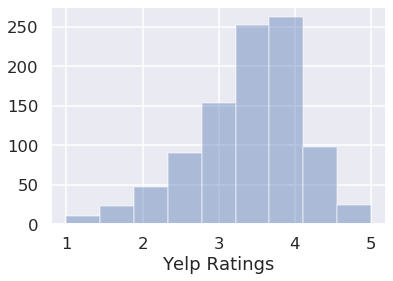

In [8]:
# Histogram of Yelp Ratings (1 star - 5 stars)
histRate = sns.distplot(df['rating'], axlabel='Yelp Ratings', kde=False, bins=9)

The histogram of the total number of health violations had a very distinct right-skew because there aren't as many restaurants with hundreds of health violations. 

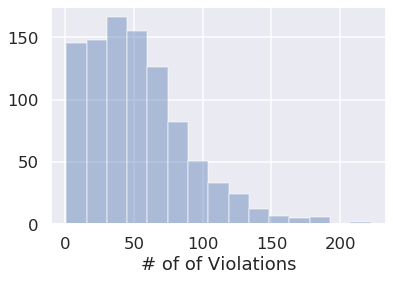

In [9]:
# Histogram of # of Violations (0-250)
histVio = sns.distplot(df['vio'], axlabel='# of of Violations', kde=False, bins=15)

This scatterplot of all the restaurant data wasn't very helpful because it was measured by the total Yelp Ratings and the total Number of Health Violations. This showed a very messy scatterplot with unclear density areas because everything was so cramped. It did show a slight normal distribution but I believe this is due to the influence of the normally distributed ratings data. I ran a regression on this data and found a fairly straight line with a slight negative slope.

In addition to vague scatterplot distribution, I colored the points by the median family income of the restaurant's zipcode. This didn't show very distinct results but I did notice a lot of the high violation restaurants were lighter colored (lower median family income), while the restaurants with less violations were usually darker in color (higher median family income).

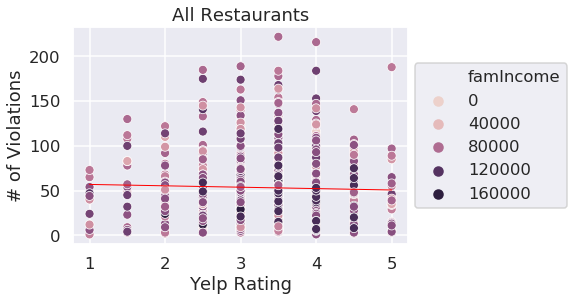

In [10]:
# Scatterplot of Yelp-Rating X #-of-Violations of All Restaurants / Colored by Median Family Income
ax = sns.scatterplot(x='rating', y='vio', hue='famIncome', data=df, legend='brief')
ax.legend(loc='center right', bbox_to_anchor=(1.5,0.5), ncol=1)
plt.title('All Restaurants')
plt.xlabel('Yelp Rating')
plt.ylabel('# of Violations')

# Line of Regression
a1, b1 = np.polyfit(df['rating'], df['vio'], 1)
xs = np.arange(1,6)
ys = a1*xs+b1
plt.plot(xs, ys, linewidth=1, color='red', label='Model')

Since the total dataset couldn't be judged based on Ratings vs. #-of-Violations, I found the average data grouped by each zipcode to find a different spread of data with more gradual values. I created a similar scatterplot of the Avg Yelp Ratings vs. the Avg # of Violations per Zipcode, and found a more interesting graphical representation.

The average number of violations were fairly standard around 40-50 per zipcode, but there were definitely more violations in zipcodes with lower average Yelp ratings. Coloring the zipcode data by median family income also showed previously predicted results of higher median zipcodes with less violations. There are still outliers in each aspect but this scatterplot was a better representation of the relationships we were looking for. 

The line of regression I found for this scatterplot also looked better because there is a distinctly negative slope. This negative regression line could be interpreted to less violations in a certain zipcode as the Yelp ratings are higher on average. Although the negative slope shows promise, this scatterplot is still not very fit to this line so it is inconclusive if this can be used to prove a clear correlation. 

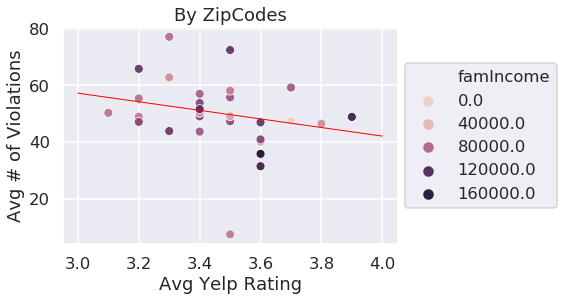

In [11]:
# Grouped dataset by ZipCodes - found average values for each zipcode
# Scatterplot of Avg-Yelp-Rating X Avg-#-of-Violations for each zipcode
ax = sns.scatterplot(x='rating', y='vio', hue='famIncome', data=byZip, legend='brief')
ax.legend(loc='center right', bbox_to_anchor=(1.5,0.5), ncol=1)
plt.title('By ZipCodes')
plt.xlabel('Avg Yelp Rating')
plt.ylabel('Avg # of Violations')

# Line of Regression
a1, b1 = np.polyfit(byZip['rating'], byZip['vio'], 1)
xs = np.arange(3,5)
ys = a1*xs+b1
plt.plot(xs, ys, linewidth=1, color='red', label='Model')

Following the previous scatterplot, I switched the X-axis with the color legend just to test out a different graphical representation. This scatterplot showed the correlation between the average median fmaily income vs. the avverage number of health violations in a specific zipcode. If this followed our hypothesis, we would expect higher number of violations in zipcodes with lower median family income levels, but it showed a very vague correlation between these variables. 

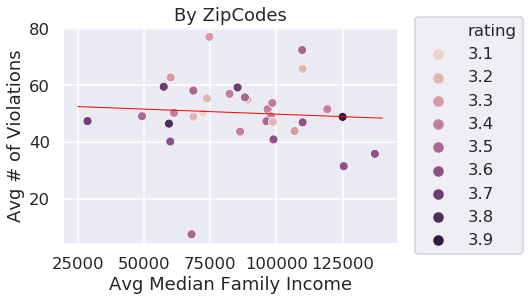

In [14]:
# Grouped dataset by ZipCodes - found average values for each zipcode
# Scatterplot of Avg-Med-Family-Income X Avg-#-of-Violations for each zipcode
ax = sns.scatterplot(x='famIncome', y='vio', data=byZip, hue='rating', legend='full')
ax.legend(loc='center right', bbox_to_anchor=(1.4,0.5), ncol=1)
plt.title('By ZipCodes')
plt.xlabel('Avg Median Family Income')
plt.ylabel('Avg # of Violations')

# Line of Regression
a1, b1 = np.polyfit(byZip['famIncome'], byZip['vio'], 1)
xs = np.arange(25000,140000)
ys = a1*xs+b1
plt.plot(xs, ys, linewidth=1, color='red', label='Model')

Text(0, 0.5, 'Avg # of Violations')

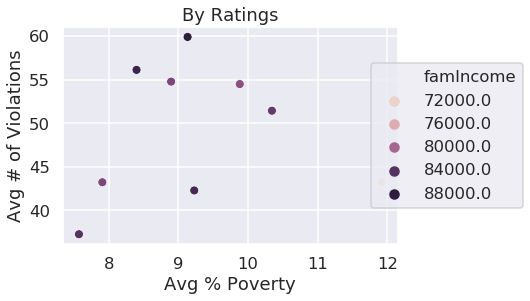

In [13]:
# Grouped dataset by Ratings - found average values for each rating
# Scatterplot of Avg-%-Below-Poverty X Avg-#-of-Violations for each rating
ax = sns.scatterplot(x='percentpov', y='vio', data=byRate, hue='famIncome', legend='brief')
ax.legend(loc='center right', bbox_to_anchor=(1.4,0.5), ncol=1)
plt.title('By Ratings')
plt.xlabel('Avg % Poverty')
plt.ylabel('Avg # of Violations')

Ideally, I would have wanted access to a dataset that has the ratings and the written Yelp reviews of restaurants in a certain area. I had an idea to weight the ratings by the actual number of Yelp reviews because highly reviewed restaurants have more trustworthy ratings since they are averaged over a larger population. 

In addition to the Number-of-Violations, I believe I could have also used the actual health inspection scores of each restaurant to create scatterplots. This data would have more data on the average scores and show a better picture of the health sanitation level rather than judging how bad a restaurant is by the number of health violations. In continuation with this project, I would also like to analyze more with the percentage below poverty line data and median household income. Intuitively, I feel like these are variables that affect health sanitation scores but I don't have the clearest data visuals to prove it yet.

# Ethics & Privacy

I wanted to use website information because the data would generally be accessible to the public. The health sanitation scores for restaurants should also be accessible to the general public so there shouldn't be many privacy concerns in this aspect. If we were to use the actual reviews of Yelp users, there would be a concern in privacy but in this project I only used the average rating of the restaurants which didn't use specific user data. 

I do believe there could be unintended consequences of this analysis since it relates to the socioeconomic statuses of different zipcodes. If it is proven that certain zipcodes have more health code violations, there could be less customers in the future or business failures because of the bad representation in that zipcode. There could also be biases when health sanitation workers inspect restaurants in problematic zipcodes. 

# Conclusion & Discussion

My hypothesis was to show a positive correlation in negative Yelp Ratings and economically unstable zipcodes. My data resulted in inconclusive analyses because there were no strong correlations between Yelp ratings and the number of health violations found in those areas. 

The datasets I used were imperfect because I could have cleaned it better with more realiable data. I realized that I found the total value counts from all of the violation data regardless of whem the health violation was. This means that it could have widely outdated data and older restaurants are at more of a disadvantage because they've had more health inspections in general. Corresponding to this point, I also used all of the Yelp data without cleaning out the "is_closed" columns. On one hand, it could be helpful to understand all of the restaurant data even from closed restaurants, but this could also skew the data to incorporate outliers that are no longer relevant. 

In conclusion, I analyzed data that could show a positive correlation between negative Yelp ratings and certain zipcodes by comparing it with the corresponding number of health violations found in those areas. But I was unable to find conclusive data that showed a strong correlation among these factors. Perhaps with cleaner data and more time to analyze different aspects of the datasets, we could come to a conclusion to better aid the city government's health inspection process. 